In [1]:
# pip install xlrd

In [2]:
#Loading and Inspecting the Dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score,accuracy_score,classification_report
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from matplotlib import rcParams
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Loading and Inspecting the Dataset
file_path = 'INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls'
data = pd.read_excel(file_path)

In [4]:
# Set the option to display all columns & rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
data.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,4,55,3,2,4,1,No,12,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,4,42,3,2,1,2,No,12,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,4,48,2,3,1,5,Yes,21,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,2,73,2,5,4,3,No,15,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,1,84,3,2,1,8,No,14,4,10,1,3,2,2,2,2,No,3


In [6]:
data.tail()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
1195,E100992,27,Female,Medical,Divorced,Sales,Sales Executive,Travel_Frequently,3,1,4,71,4,2,4,1,Yes,20,2,6,3,3,6,5,0,4,No,4
1196,E100993,37,Male,Life Sciences,Single,Development,Senior Developer,Travel_Rarely,10,2,4,80,4,1,4,3,No,17,1,4,2,3,1,0,0,0,No,3
1197,E100994,50,Male,Medical,Married,Development,Senior Developer,Travel_Rarely,28,1,4,74,4,1,3,1,Yes,11,3,20,3,3,20,8,3,8,No,3
1198,E100995,34,Female,Medical,Single,Data Science,Data Scientist,Travel_Rarely,9,3,4,46,2,3,2,1,No,14,2,9,3,4,8,7,7,7,No,3
1199,E100998,24,Female,Life Sciences,Single,Sales,Sales Executive,Travel_Rarely,3,2,1,65,3,2,3,9,No,14,1,4,3,3,2,2,2,0,Yes,2


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 13  EmpJobLevel       

In [8]:
data.describe()

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
count,1200.000000,1200.000000,1200.00000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,36.918333,9.165833,2.89250,2.715833,65.981667,2.731667,2.067500,2.732500,2.665000,15.222500,2.725000,11.330000,2.785833,2.744167,7.077500,4.291667,2.194167,4.105000,2.948333
std,9.087289,8.176636,1.04412,1.090599,20.211302,0.707164,1.107836,1.100888,2.469384,3.625918,1.075642,7.797228,1.263446,0.699374,6.236899,3.613744,3.221560,3.541576,0.518866
min,18.000000,1.000000,1.00000,1.000000,30.000000,1.000000,1.000000,1.000000,0.000000,11.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,30.000000,2.000000,2.00000,2.000000,48.000000,2.000000,1.000000,2.000000,1.000000,12.000000,2.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,3.000000
50%,36.000000,7.000000,3.00000,3.000000,66.000000,3.000000,2.000000,3.000000,2.000000,14.000000,3.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,3.000000
75%,43.000000,14.000000,4.00000,4.000000,83.000000,3.000000,3.000000,4.000000,4.000000,18.000000,4.000000,15.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000,3.000000
max,60.000000,29.000000,5.00000,4.000000,100.000000,4.000000,5.000000,4.000000,9.000000,25.000000,4.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,4.000000


In [9]:
data.isnull().sum()

EmpNumber                       0
Age                             0
Gender                          0
EducationBackground             0
MaritalStatus                   0
EmpDepartment                   0
EmpJobRole                      0
BusinessTravelFrequency         0
DistanceFromHome                0
EmpEducationLevel               0
EmpEnvironmentSatisfaction      0
EmpHourlyRate                   0
EmpJobInvolvement               0
EmpJobLevel                     0
EmpJobSatisfaction              0
NumCompaniesWorked              0
OverTime                        0
EmpLastSalaryHikePercent        0
EmpRelationshipSatisfaction     0
TotalWorkExperienceInYears      0
TrainingTimesLastYear           0
EmpWorkLifeBalance              0
ExperienceYearsAtThisCompany    0
ExperienceYearsInCurrentRole    0
YearsSinceLastPromotion         0
YearsWithCurrManager            0
Attrition                       0
PerformanceRating               0
dtype: int64

In [10]:
data.EmpDepartment.value_counts()

EmpDepartment
Sales                     373
Development               361
Research & Development    343
Human Resources            54
Finance                    49
Data Science               20
Name: count, dtype: int64

In [11]:
for column in data:
    print(column)

EmpNumber
Age
Gender
EducationBackground
MaritalStatus
EmpDepartment
EmpJobRole
BusinessTravelFrequency
DistanceFromHome
EmpEducationLevel
EmpEnvironmentSatisfaction
EmpHourlyRate
EmpJobInvolvement
EmpJobLevel
EmpJobSatisfaction
NumCompaniesWorked
OverTime
EmpLastSalaryHikePercent
EmpRelationshipSatisfaction
TotalWorkExperienceInYears
TrainingTimesLastYear
EmpWorkLifeBalance
ExperienceYearsAtThisCompany
ExperienceYearsInCurrentRole
YearsSinceLastPromotion
YearsWithCurrManager
Attrition
PerformanceRating


In [12]:
# Data Preprocessing
data = data.dropna()

In [13]:
print("\nProcessed Data:")
data


Processed Data:


,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,4,55,3,2,4,1,No,12,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,4,42,3,2,1,2,No,12,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,4,48,2,3,1,5,Yes,21,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,2,73,2,5,4,3,No,15,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,1,84,3,2,1,8,No,14,4,10,1,3,2,2,2,2,No,3
5,E1001011,27,Male,Life Sciences,Divorced,Development,Developer,Travel_Frequently,10,2,4,32,3,3,1,1,No,21,3,9,4,2,9,7,1,7,No,4
6,E1001016,50,Male,Marketing,Married,Sales,Sales Representative,Travel_Rarely,8,4,4,54,3,1,2,7,No,15,4,4,2,3,2,2,2,2,No,3
7,E1001019,28,Female,Life Sciences,Single,Development,Developer,Travel_Rarely,1,2,1,67,1,1,2,7,Yes,13,4,10,4,3,7,7,3,7,Yes,3
8,E1001020,36,Female,Life Sciences,Married,Development,Developer,Non-Travel,8,3,1,63,4,3,1,9,No,14,1,10,2,3,8,7,0,5,No,3
9,E1001021,38,Female,Life Sciences,Single,Development,Developer,Travel_Rarely,1,3,3,81,3,3,3,4,Yes,14,4,10,4,4,1,0,0,0,No,3


In [14]:
# Task No.1:-

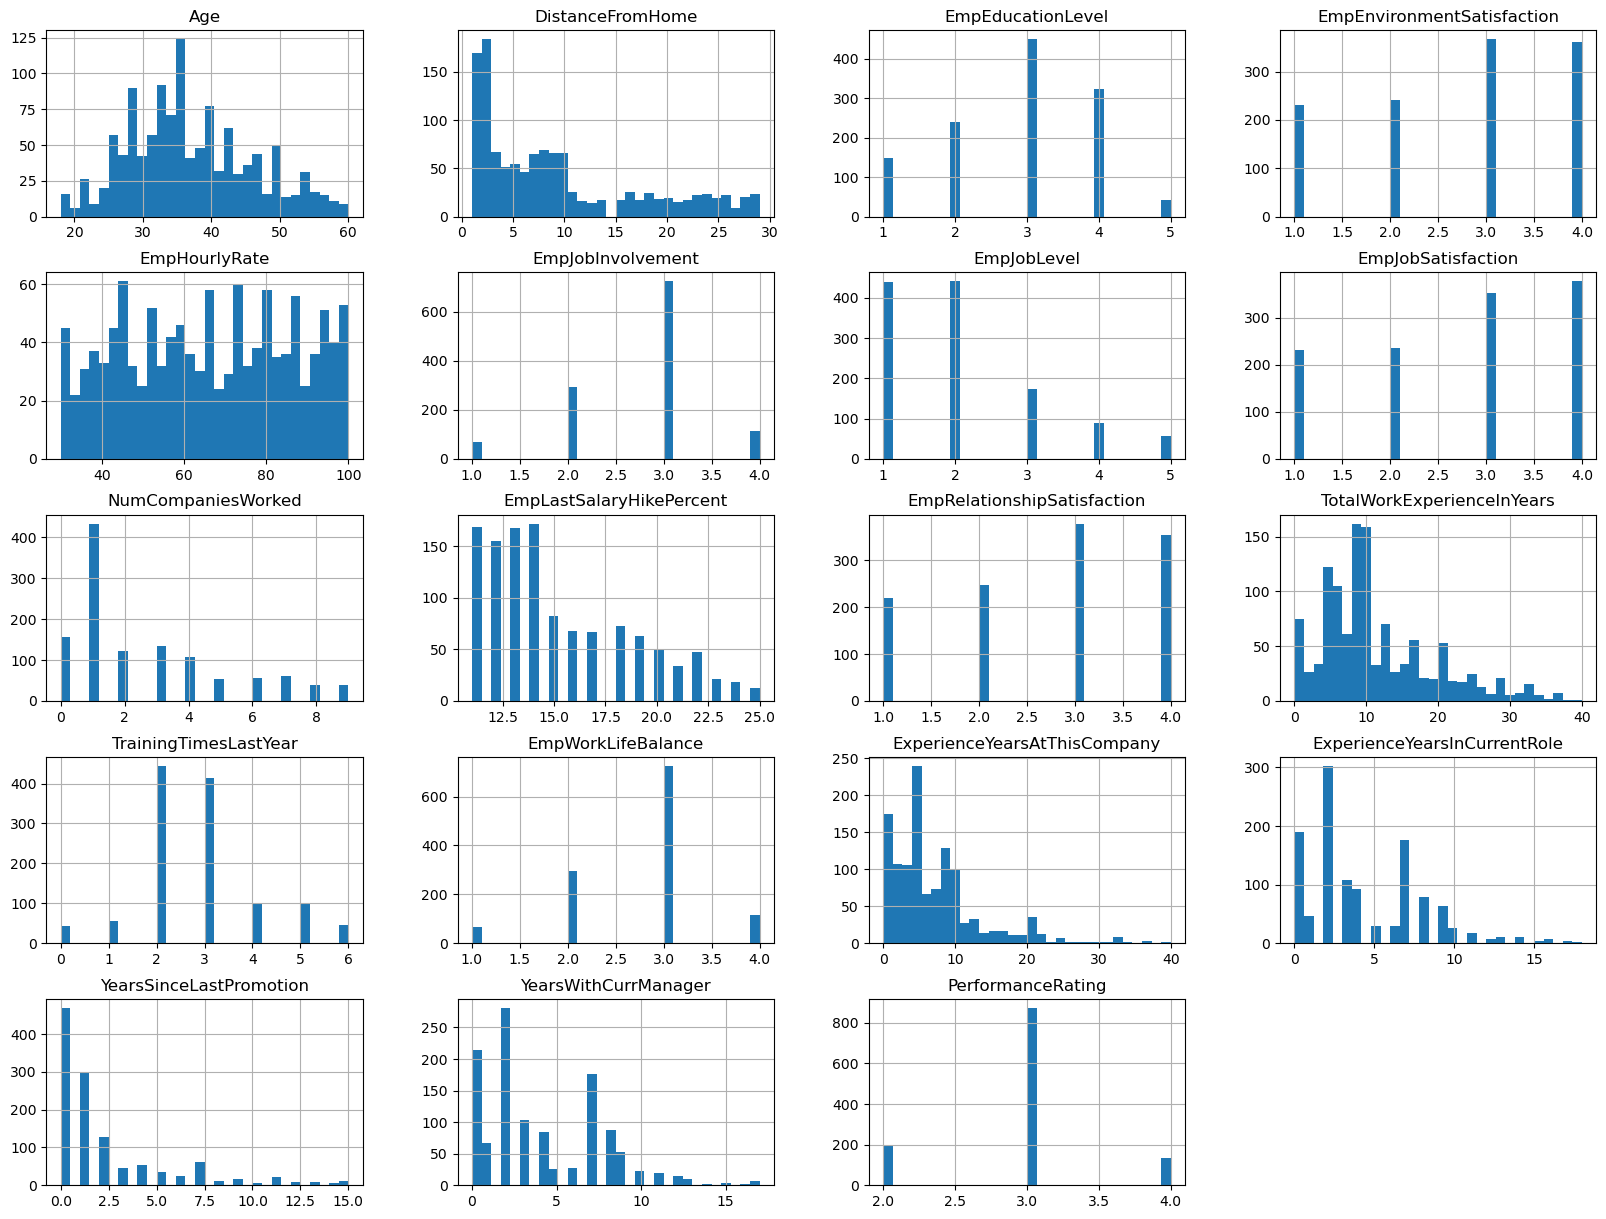

In [15]:
# Univariate Analysis
# Histograms
data.hist(bins=30, figsize=(20, 15))
plt.show()

In [16]:
import sweetviz as sv #  library for univariant analysis

my_report = sv.analyze(data)## pass the original dataframe

my_report.show_html() # Default arguments will generate to "SWEETVIZ_REPORT.html"

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [17]:
# Task No.1
# Group by department and calculate mean performance score
dept_performance = data.groupby('EmpDepartment')['PerformanceRating'].mean().reset_index()

In [18]:
print("***Department Wise Performance***")
dept_performance

***Department Wise Performance***


,EmpDepartment,PerformanceRating
0,Data Science,3.050000
1,Development,3.085873
2,Finance,2.775510
3,Human Resources,2.925926
4,Research & Development,2.921283
5,Sales,2.860590


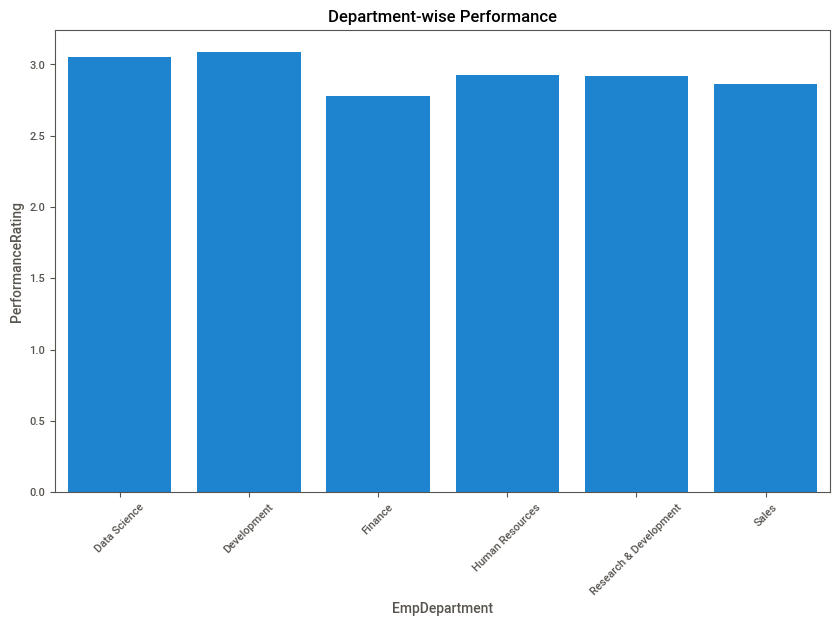

In [19]:
# Plot the department-wise performance
plt.figure(figsize=(10, 6))
sns.barplot(x='EmpDepartment', y='PerformanceRating', data=dept_performance)
plt.title('Department-wise Performance')
plt.xticks(rotation=45)
plt.show()

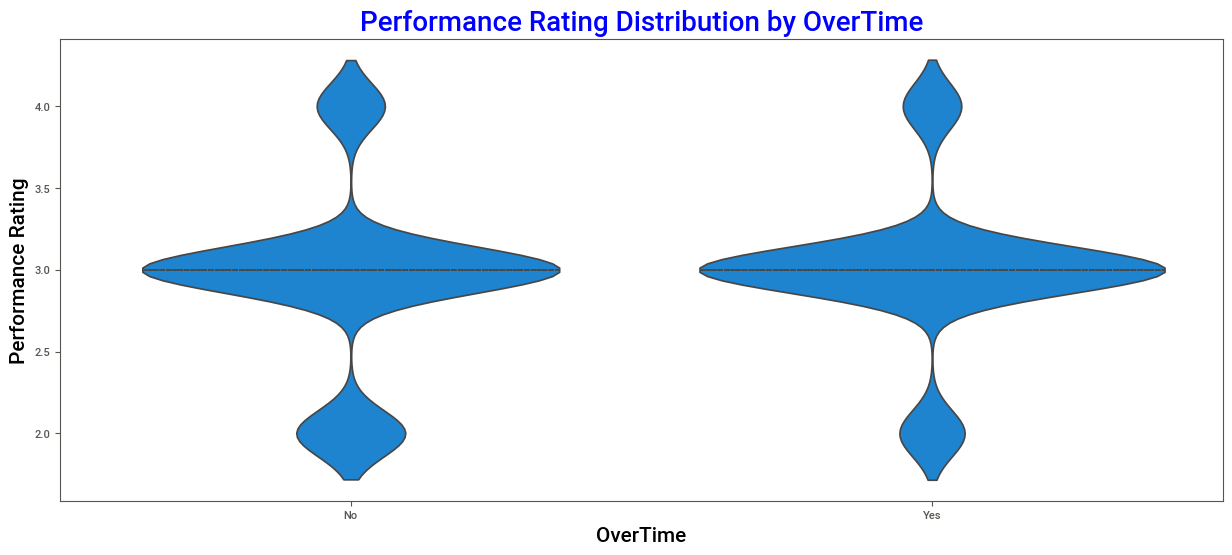

In [20]:
plt.figure(figsize=(15, 6))
sns.violinplot(data=data, x='OverTime', y='PerformanceRating', inner='quartile')
plt.xlabel("OverTime", fontsize=15, color='black')
plt.ylabel("Performance Rating", fontsize=15, color='black')
plt.title("Performance Rating Distribution by OverTime", fontsize=20, color='blue')
plt.show()

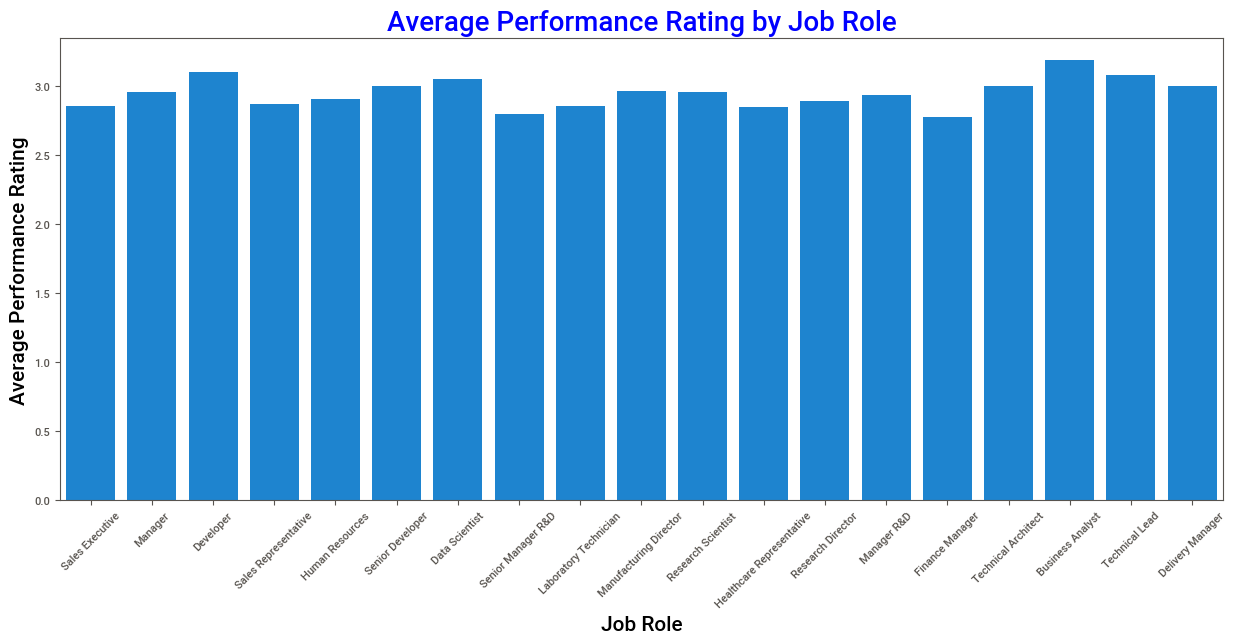

In [21]:
plt.figure(figsize=(15, 6))
sns.barplot(data=data, x='EmpJobRole', y='PerformanceRating', ci=None)
plt.xticks(rotation=45)
plt.xlabel("Job Role", fontsize=15, color='black')
plt.ylabel("Average Performance Rating", fontsize=15, color='black')
plt.title("Average Performance Rating by Job Role", fontsize=20, color='blue')
plt.show()


In [22]:
# Identify categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns


In [23]:
# Fit the label encoders during training
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

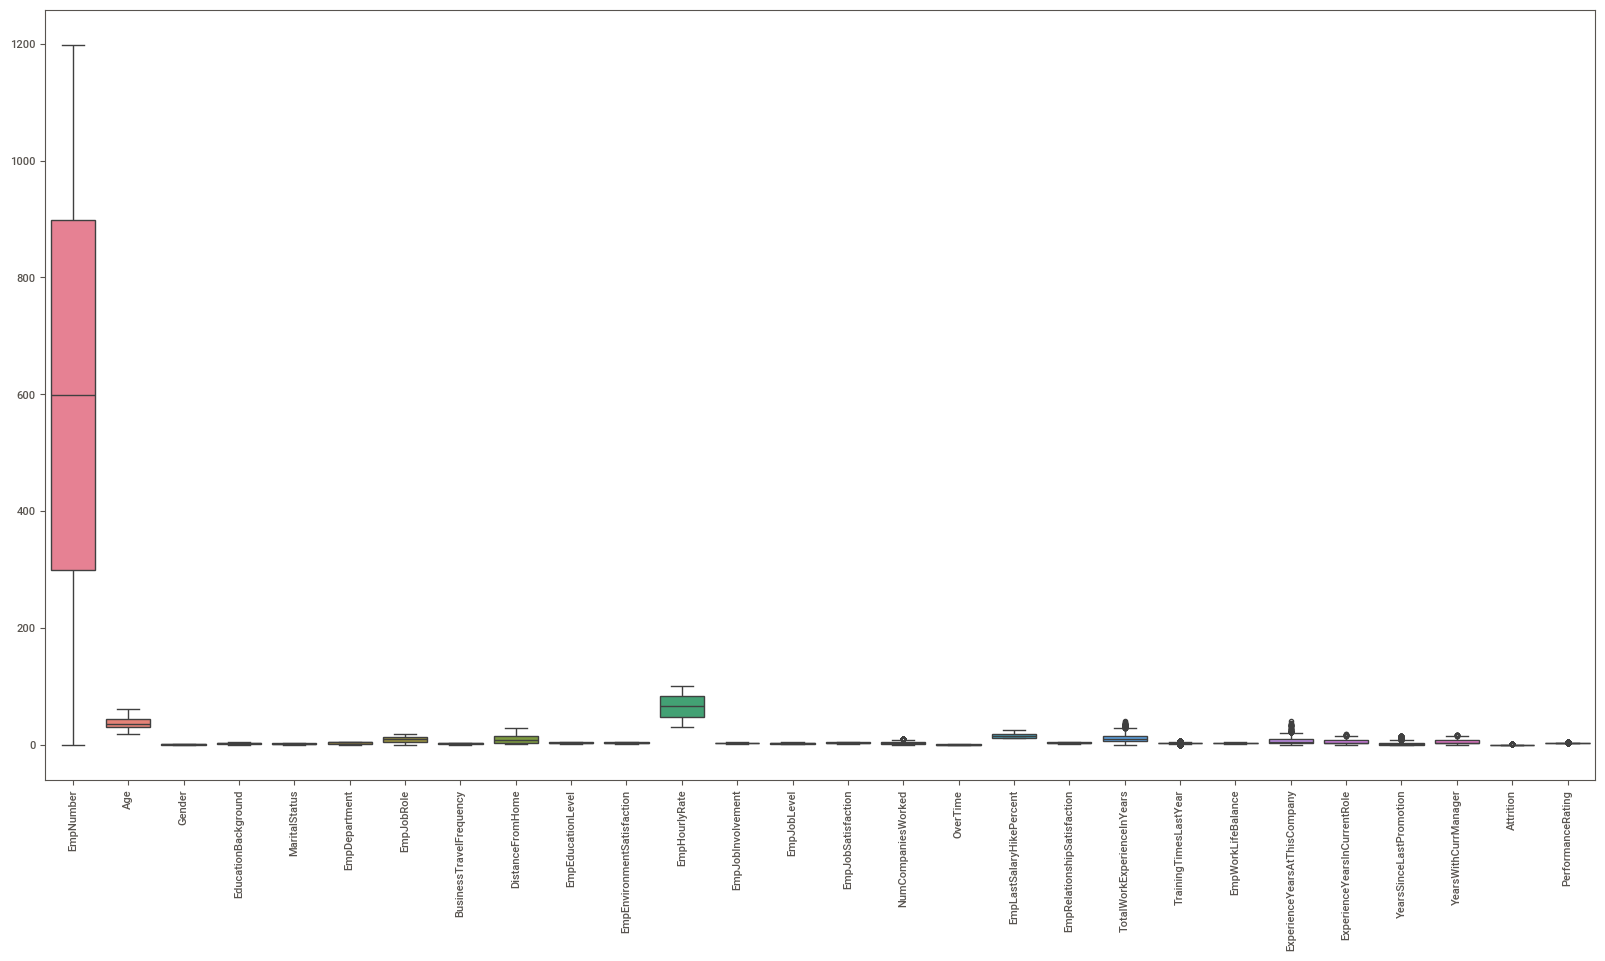

In [24]:
# Visualize feature importances
plt.figure(figsize=(20, 10))
sns.boxplot(data=data)
plt.xticks(rotation=90)
plt.show()

In [25]:
# Drop 'EmpNumber' and the target 'PerformanceRating'
df_heatmap = data.drop(columns=['EmpNumber', 'PerformanceRating'])

# Create a correlation matrix
correlation_matrix = df_heatmap.corr()

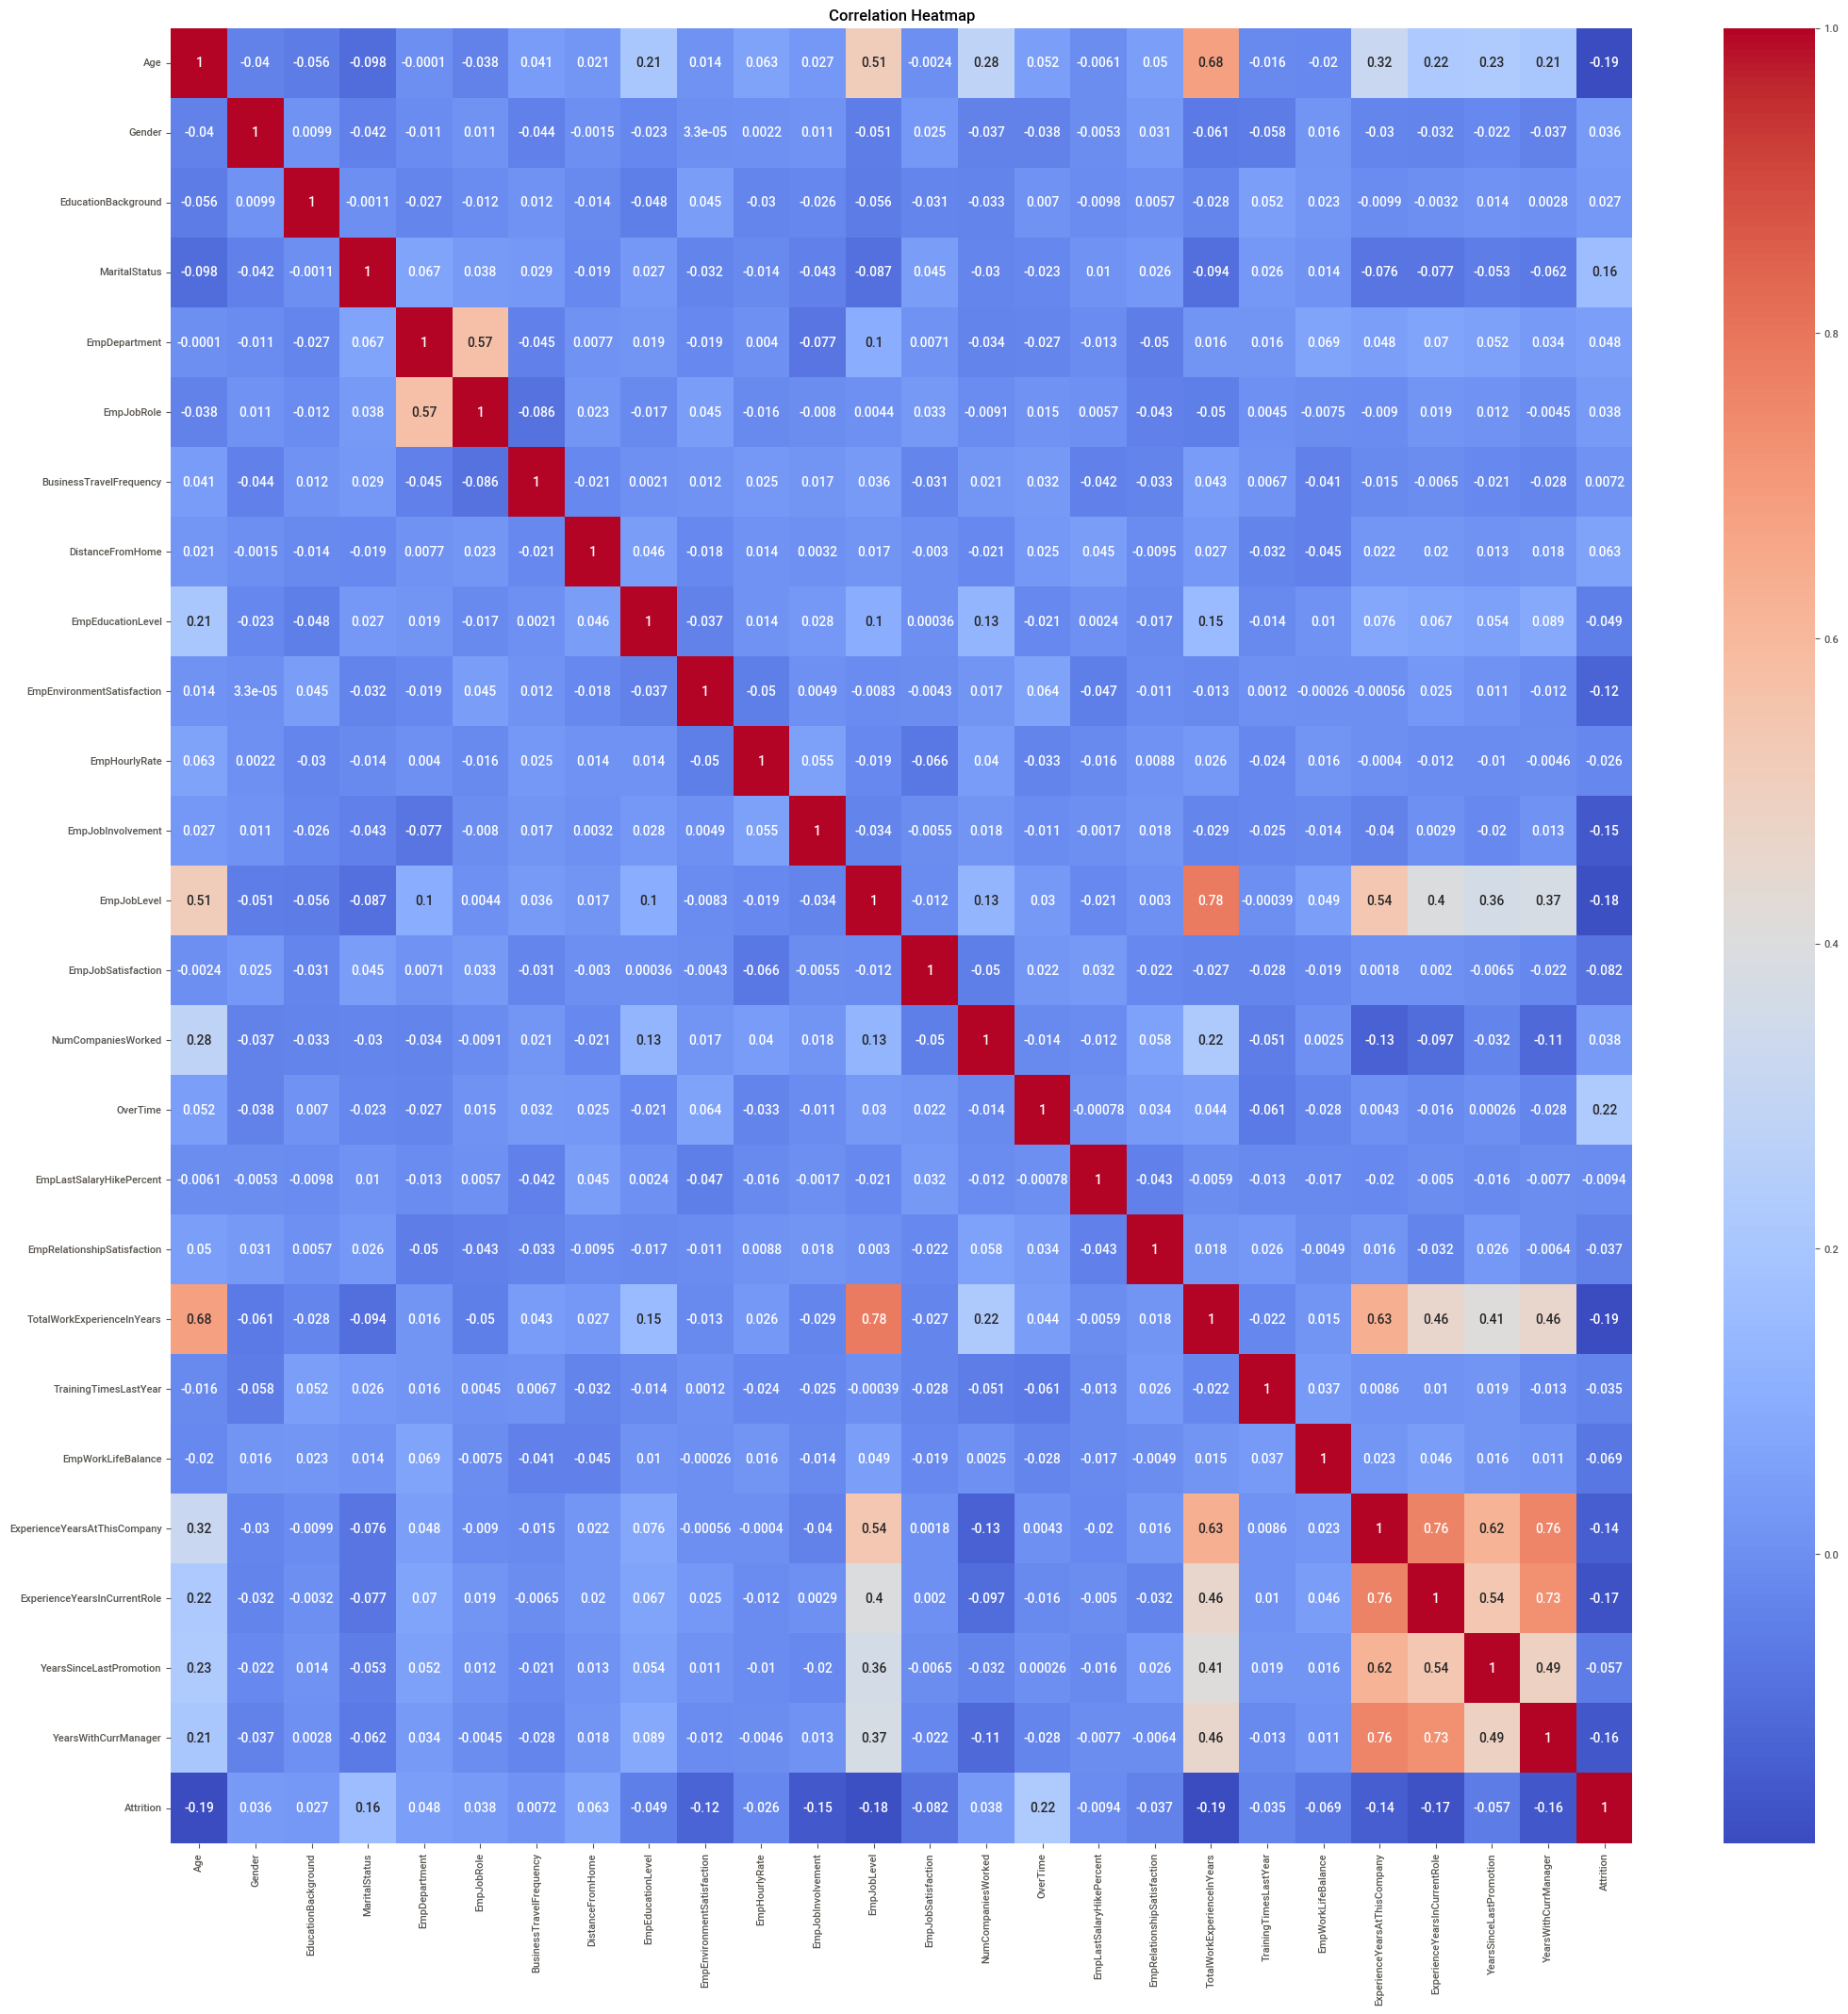

In [26]:
# Correlation heatmap
plt.figure(figsize=(25, 25))
sns.heatmap(df_heatmap.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

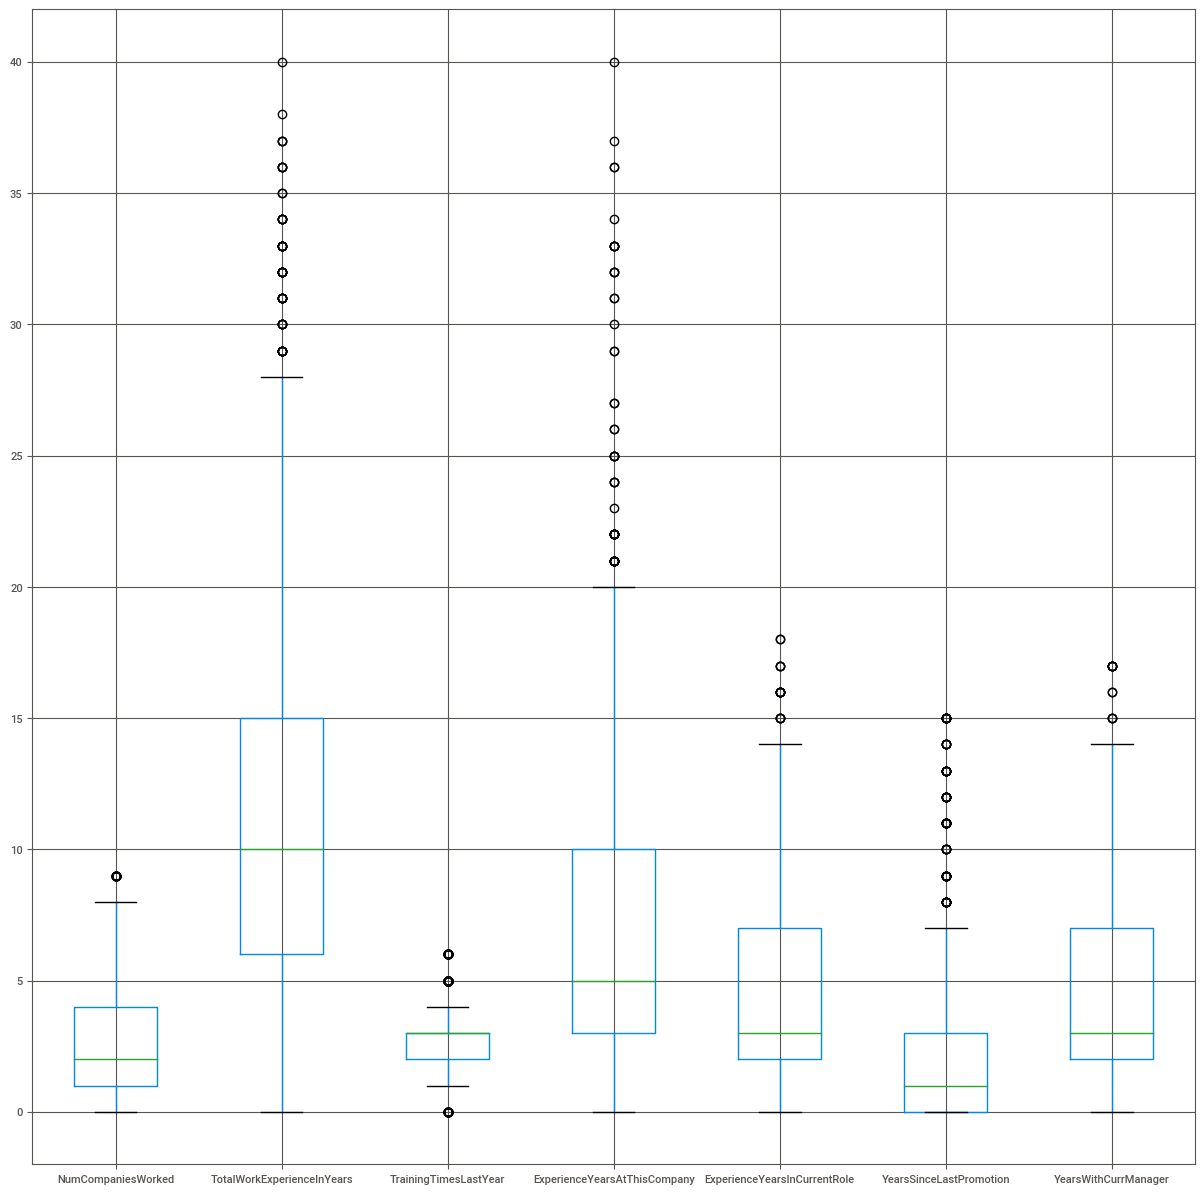

In [27]:
# Checking for outliers
plt.figure(figsize=(15,15))
data[['NumCompaniesWorked','TotalWorkExperienceInYears','TrainingTimesLastYear','ExperienceYearsAtThisCompany',
            'ExperienceYearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']].boxplot();

1082/1200 data points remain


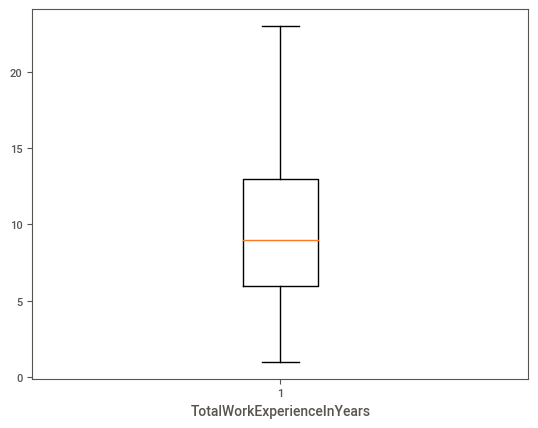

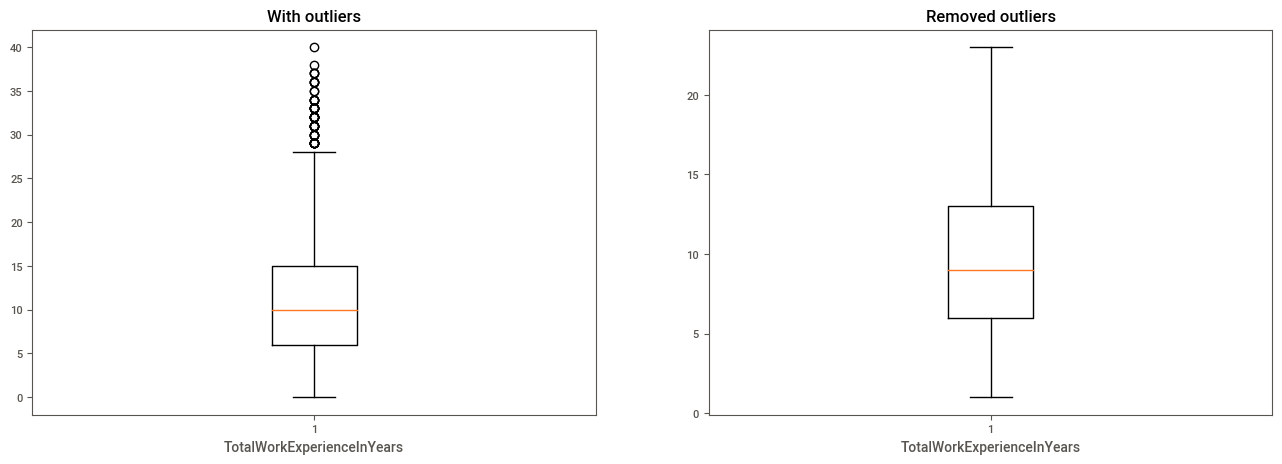

In [28]:
# Removing outliers for TotalWorkExperienceInYears
X=data.TotalWorkExperienceInYears
removed_outliers_TotalWorkExperienceInYears = X.between(X.quantile(0.01),X.quantile(0.90))
print(str(X[removed_outliers_TotalWorkExperienceInYears].size)+"/"+str(X.size)+" data points remain")
plt.boxplot(X[removed_outliers_TotalWorkExperienceInYears]);
plt.xlabel("TotalWorkExperienceInYears")
figure,axis=plt.subplots(1,2,figsize=(16,5))
axis[0].boxplot(X);
axis[1].boxplot(X[removed_outliers_TotalWorkExperienceInYears]);
axis[0].set_title("With outliers") 
axis[0].set_xlabel("TotalWorkExperienceInYears")
axis[1].set_title("Removed outliers")
axis[1].set_xlabel("TotalWorkExperienceInYears")

data['clean_TotalWorkExperienceInYears']=X[removed_outliers_TotalWorkExperienceInYears]

985/1200 data points remain


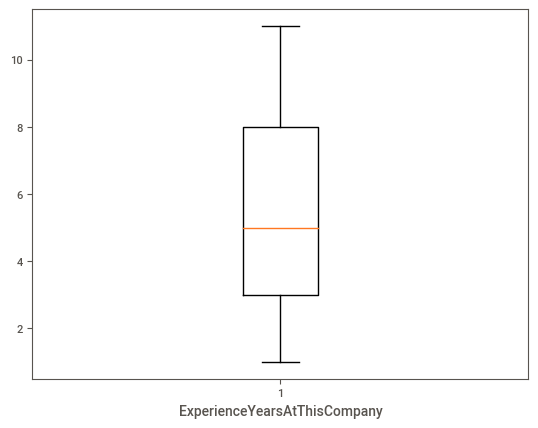

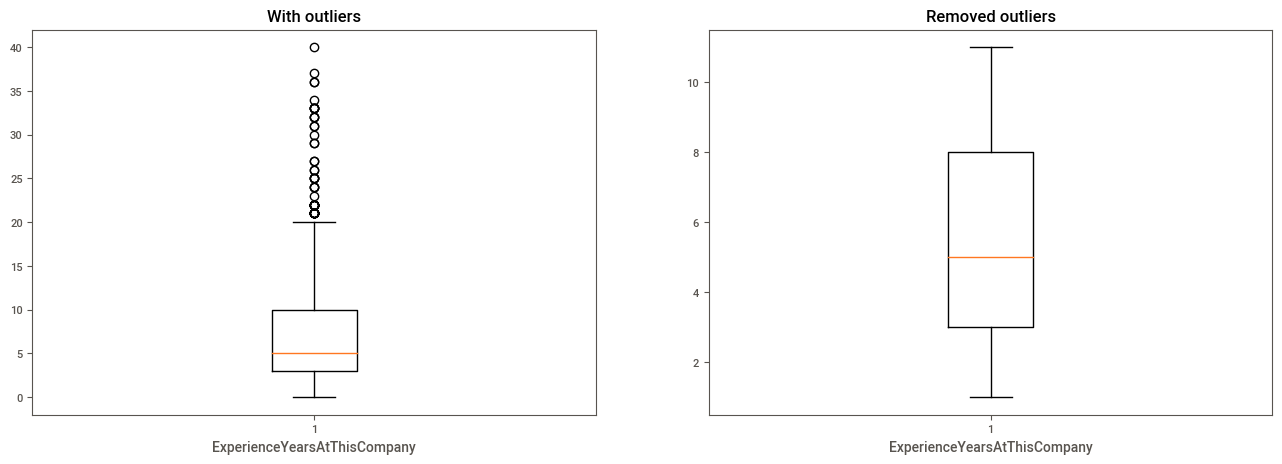

In [29]:
# Removing outliers for ExperienceYearsAtThisCompany
X=data.ExperienceYearsAtThisCompany
removed_outliers_ExperienceYearsAtThisCompany = X.between(X.quantile(0.05),X.quantile(0.85))
print(str(X[removed_outliers_ExperienceYearsAtThisCompany].size)+"/"+str(X.size)+" data points remain")
plt.boxplot(X[removed_outliers_ExperienceYearsAtThisCompany]);
plt.xlabel("ExperienceYearsAtThisCompany")
figure,axis=plt.subplots(1,2,figsize=(16,5))
axis[0].boxplot(X);
axis[1].boxplot(X[removed_outliers_ExperienceYearsAtThisCompany]);
axis[0].set_title("With outliers") 
axis[0].set_xlabel("ExperienceYearsAtThisCompany")
axis[1].set_title("Removed outliers")
axis[1].set_xlabel("ExperienceYearsAtThisCompany")

data['clean_ExperienceYearsAtThisCompany']=X[removed_outliers_ExperienceYearsAtThisCompany]

1026/1200 data points remain


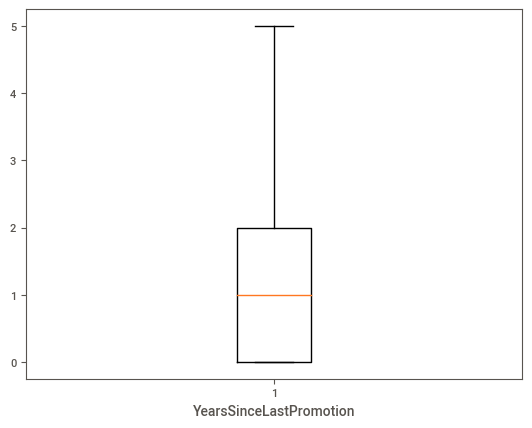

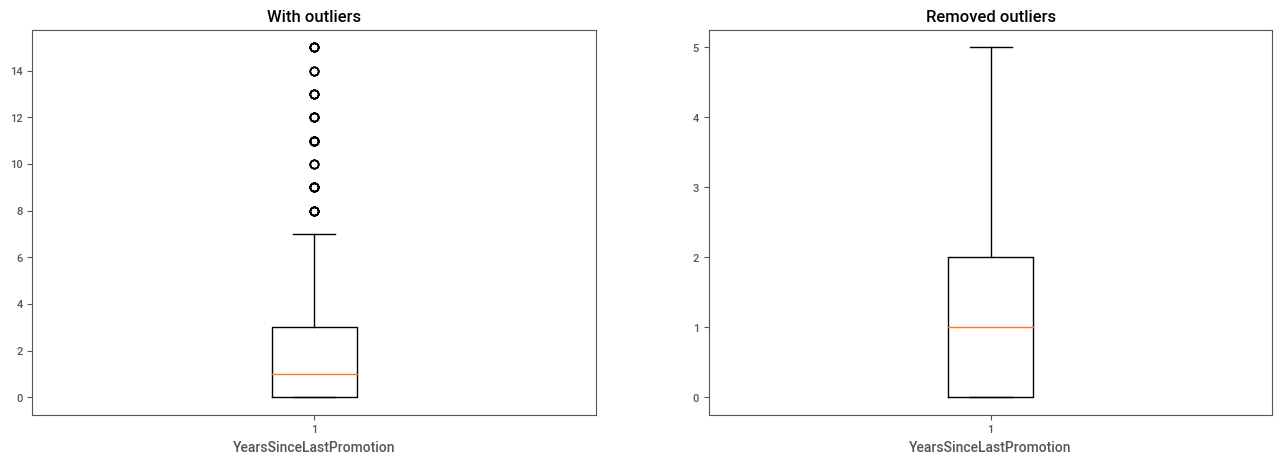

In [30]:
# Removing outliers for YearsSinceLastPromotion
X=data.YearsSinceLastPromotion
removed_outliers_YearsSinceLastPromotion = X.between(X.quantile(0.09),X.quantile(0.85))
print(str(X[removed_outliers_YearsSinceLastPromotion].size)+"/"+str(X.size)+" data points remain")
plt.boxplot(X[removed_outliers_YearsSinceLastPromotion]);
plt.xlabel("YearsSinceLastPromotion")
figure,axis=plt.subplots(1,2,figsize=(16,5))
axis[0].boxplot(X);
axis[1].boxplot(X[removed_outliers_YearsSinceLastPromotion]);
axis[0].set_title("With outliers") 
axis[0].set_xlabel("YearsSinceLastPromotion")
axis[1].set_title("Removed outliers")
axis[1].set_xlabel("YearsSinceLastPromotion")

data['clean_YearsSinceLastPromotion']=X[removed_outliers_YearsSinceLastPromotion]

In [31]:
# Filling missing numeric values in dataset with the most frequent value (mode)
for col in data.select_dtypes(include=['object', 'number']).columns:
    data[col].fillna(data[col].mode()[0], inplace=True)

In [32]:
data.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating,clean_TotalWorkExperienceInYears,clean_ExperienceYearsAtThisCompany,clean_YearsSinceLastPromotion
0,0,32,1,2,2,5,13,2,10,3,4,55,3,2,4,1,0,12,4,10,2,2,10,7,0,8,0,3,10.0,10.0,0.0
1,1,47,1,2,2,5,13,2,14,4,4,42,3,2,1,2,0,12,4,20,2,3,7,7,1,7,0,3,20.0,7.0,1.0
2,2,40,1,1,1,5,13,1,5,4,4,48,2,3,1,5,1,21,3,20,2,3,18,13,1,12,0,4,20.0,5.0,1.0
3,3,41,1,0,0,3,8,2,10,4,2,73,2,5,4,3,0,15,2,23,2,2,21,6,12,6,0,3,23.0,5.0,0.0
4,4,60,1,2,2,5,13,2,16,4,1,84,3,2,1,8,0,14,4,10,1,3,2,2,2,2,0,3,10.0,2.0,2.0


In [33]:
from sklearn.svm import SVR

In [34]:
# Task No.2:-

In [35]:
# Feature columns (exclude performance score from input features)
features = data.drop(columns=['PerformanceRating'])

In [36]:
# Encode categorical variables
features = pd.get_dummies(features)

In [37]:
# Target column
target = data['PerformanceRating']

In [38]:
# Features and Target
X = data.drop(columns=[ 'PerformanceRating'])  
y = data['PerformanceRating']

In [39]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [40]:
# Standardize features for models that require scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [41]:
# Different Machine Learning Algorithms to train and predict the mode
# Using Random forest Classifier

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [43]:
# Train a Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [44]:
# Predict on test set
y_pred = rf_clf.predict(X_test)

In [45]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.95
              precision    recall  f1-score   support

           2       0.96      0.93      0.95        29
           3       0.95      0.99      0.97       184
           4       0.95      0.70      0.81        27

    accuracy                           0.95       240
   macro avg       0.95      0.87      0.91       240
weighted avg       0.95      0.95      0.95       240



In [46]:
# Using Decision tree clasifier

In [47]:
# Train a Random Forest Classifier
dt_clf = DecisionTreeClassifier( random_state=42)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [48]:
# Predict on test set
y_pred = dt_clf.predict(X_test)

In [49]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9083333333333333
              precision    recall  f1-score   support

           2       0.87      0.93      0.90        29
           3       0.96      0.92      0.94       184
           4       0.68      0.78      0.72        27

    accuracy                           0.91       240
   macro avg       0.83      0.88      0.85       240
weighted avg       0.91      0.91      0.91       240



In [50]:
# Using Logistic Regression

In [51]:
# Train a Logistic Classifier
lr_clf = LogisticRegression( random_state=42)
lr_clf.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [52]:
# Predict on test set
y_pred = lr_clf.predict(X_test)

In [53]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8
              precision    recall  f1-score   support

           2       0.56      0.17      0.26        29
           3       0.84      0.93      0.88       184
           4       0.59      0.59      0.59        27

    accuracy                           0.80       240
   macro avg       0.66      0.56      0.58       240
weighted avg       0.78      0.80      0.77       240



In [54]:
# Feature importance(Random forest classifier)
feature_importances = pd.DataFrame({
    'Feature': features.columns,
    'Importance': rf_clf.feature_importances_
}).sort_values(by='Importance', ascending=False)

In [55]:
# Top 3 factors
top_3_factors = feature_importances.head(3)

In [56]:
# Task No.2
print("Top 3 Important Factors Affecting Performance:")
top_3_factors

Top 3 Important Factors Affecting Performance:


,Feature,Importance
10,EmpEnvironmentSatisfaction,0.205364
17,EmpLastSalaryHikePercent,0.193202
24,YearsSinceLastPromotion,0.066232


In [57]:
data.groupby(by=['EmpDepartment'])['PerformanceRating'].mean()

EmpDepartment
0    3.050000
1    3.085873
2    2.775510
3    2.925926
4    2.921283
5    2.860590
Name: PerformanceRating, dtype: float64

In [58]:
# Using GridSearch Cross Validation(CV) in Random Forest Classifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_absolute_error, mean_squared_error, r2_score

In [59]:
model=RandomForestClassifier(max_depth=3,
                            criterion='gini',
                            n_estimators=10,
                            random_state=5)
parameters={'max_depth': [2,3],
              'n_estimators':[10,20],
              'random_state' : [5]}
grid=GridSearchCV(model,parameters,scoring='accuracy',cv=15)
grid.fit(X_train,y_train)

GridSearchCV(cv=15,
             estimator=RandomForestClassifier(max_depth=3, n_estimators=10,
                                              random_state=5),
             param_grid={'max_depth': [2, 3], 'n_estimators': [10, 20],
                         'random_state': [5]},
             scoring='accuracy')

In [60]:
print("Best Score =  ",grid.best_score_)
print("Best Params = ",grid.best_params_)

Best Score =   0.8041666666666667
Best Params =  {'max_depth': 3, 'n_estimators': 10, 'random_state': 5}


In [61]:
# Predict the model
y_train_predict=grid.predict(X_train)
y_predict=grid.predict(X_test)

In [62]:
# Calculating Accuracy Score,Precision score, recall score and F1 score

print("Accuracy Score of Training = ",(accuracy_score(y_train,y_train_predict)*100))
print("Accuracy Score of Testing = ",(accuracy_score(y_test,y_predict)*100))
print("Precision score = ",(precision_score(y_test,y_predict,average='weighted')*100))
print("Recall score = ",(recall_score(y_test,y_predict,average='weighted')*100))
print("F1 score = ",(f1_score(y_test,y_predict,average='weighted')*100))

Accuracy Score of Training =  83.95833333333333
Accuracy Score of Testing =  86.66666666666667
Precision score =  88.39060877466251
Recall score =  86.66666666666667
F1 score =  82.54165808439289


In [63]:
# Generating classification report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           2       0.96      0.79      0.87        29
           3       0.86      0.99      0.92       184
           4       1.00      0.07      0.14        27

    accuracy                           0.87       240
   macro avg       0.94      0.62      0.64       240
weighted avg       0.88      0.87      0.83       240



In [64]:
reg= LogisticRegression()
reg.fit(X_train, y_train)

LogisticRegression()

In [65]:
reg.score(X_test, y_test)

0.8

In [66]:
forest= RandomForestClassifier()
forest.fit(X_train, y_train)

RandomForestClassifier()

In [67]:
forest.score(X_test, y_test)

0.9541666666666667

In [68]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [69]:
tree.score(X_test, y_test)

0.8916666666666667

In [70]:
svr = SVR()
svr.fit(X_train, y_train)

SVR()

In [71]:
svr.score(X_test, y_test)

0.0007550808685687915

In [72]:
# Using Randomized Search Cross Validation(CV) in Random Forest Classifier
from sklearn.model_selection import RandomizedSearchCV

In [73]:
model=RandomForestClassifier(max_depth=3,
                            criterion='gini',
                            n_estimators=10,
                            random_state=5)
parameters={'max_depth': [2,3],
              'n_estimators':[10,20],
              'random_state' : [5]}
randomized=RandomizedSearchCV(model,parameters,scoring='accuracy',cv=5)
randomized.fit(X_train,y_train)

RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(max_depth=3,
                                                    n_estimators=10,
                                                    random_state=5),
                   param_distributions={'max_depth': [2, 3],
                                        'n_estimators': [10, 20],
                                        'random_state': [5]},
                   scoring='accuracy')

In [74]:
print("Best Score =  ",randomized.best_score_)
print("Best Params = ",randomized.best_params_)

Best Score =   0.7947916666666668
Best Params =  {'random_state': 5, 'n_estimators': 10, 'max_depth': 3}


In [75]:
# Predict the model
y_train_predict=randomized.predict(X_train)
y_predict=randomized.predict(X_test)

In [76]:
print("\n Accuracy of Training = " ,accuracy_score(y_train,y_train_predict)*100)
print("\n Accuracy of Testing =  ", accuracy_score(y_test,y_predict)*100)


 Accuracy of Training =  83.95833333333333

 Accuracy of Testing =   86.66666666666667


In [77]:
# Calculating Precision score, recall score and F1 score
print("Precision score = ",(precision_score(y_test,y_predict,average='weighted')*100))
print("Recall score = ",(recall_score(y_test,y_predict,average='weighted')*100))
print("F1 score = ",(f1_score(y_test,y_predict,average='weighted')*100))

Precision score =  88.39060877466251
Recall score =  86.66666666666667
F1 score =  82.54165808439289


In [78]:
# Genarating classification report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           2       0.96      0.79      0.87        29
           3       0.86      0.99      0.92       184
           4       1.00      0.07      0.14        27

    accuracy                           0.87       240
   macro avg       0.94      0.62      0.64       240
weighted avg       0.88      0.87      0.83       240



In [79]:
# Task No.3

In [80]:
# Function to predict employee performance
def predict_employee_performance(model, input_data):
    
    # Get feature names used during training
    feature_names = X.columns.tolist()  # 'X' is the training data (features)
    
    # Create a dictionary with all features, initializing values to 0
    new_employee_dict = {feature: [0] for feature in feature_names}
    
    # Update dictionary with the actual values from input_data
    for key, value in input_data.items():
        if key in new_employee_dict:
            new_employee_dict[key] = [value]
    
    # Convert dictionary to DataFrame
    new_employee_df = pd.DataFrame(new_employee_dict)
    
    # Ensure the columns in new_employee_df match those used during training
    new_employee_df = new_employee_df[feature_names]
    
    # Predict the performance using the trained model
    predicted_performance = model.predict(new_employee_df)
    
    return predicted_performance[0]  # Return the predicted performance rating

In [81]:
# Example usage
new_employee_data = {
    'Age': 30,
    'Gender_Male': 1,
    'EducationBackground_Engineering': 1,
    'MaritalStatus_Single': 1,
    'EmpDepartment_Data Science': 1,
    'EmpJobRole_Data Scientist': 1,
    'BusinessTravelFrequency_Rarely': 1,
    'DistanceFromHome': 10,
    'EmpEducationLevel': 4,
    'EmpEnvironmentSatisfaction': 3,
    'EmpHourlyRate': 85,
    'EmpJobInvolvement': 3,
    'EmpJobLevel': 2,
    'EmpJobSatisfaction': 4,
    'NumCompaniesWorked': 2,
    'OverTime_Yes': 1,
    'EmpLastSalaryHikePercent': 15,
    'EmpRelationshipSatisfaction': 3,
    'clean_TotalWorkExperienceInYears': 7,
    'TrainingTimesLastYear': 2,
    'EmpWorkLifeBalance': 3,
    'clean_ExperienceYearsAtThisCompany': 5,
    'ExperienceYearsInCurrentRole': 3,
    'clean_YearsSinceLastPromotion': 2,
    'YearsWithCurrManager': 4,
    'Attrition_No': 1
}


In [82]:
# Call the function to predict employee performance (Task No.3)

predicted_performance = predict_employee_performance(rf_clf, new_employee_data)
print(f"Predicted Performance Rating for new hire: {predicted_performance}")

Predicted Performance Rating for new hire: 3


In [83]:
# Task No.4:- 

In [84]:
# based on the top features
if 'EmpLastSalaryHikePercent' in top_3_factors['Feature'].values:
    print("Recommendation: Improve work-life balance for employees to boost performance.")

if 'EmpEnvironmentSatisfaction' in top_3_factors['Feature'].values:
    print("Recommendation: Increase training opportunities for underperforming employees.")

if 'YearsSinceLastPromotion' in top_3_factors['Feature'].values:
    print("Recommendation: Tailor performance incentives based on specific job roles to drive better results.")


Recommendation: Improve work-life balance for employees to boost performance.
Recommendation: Increase training opportunities for underperforming employees.
Recommendation: Tailor performance incentives based on specific job roles to drive better results.


In [85]:
# Business Case for Employee Performance Prediction Project:

# INX Future Inc. has been facing declining employee performance and reduced client satisfaction, which threatens its reputation
# as a top employer and affects overall business outcomes. The company's leadership, concerned about penalizing employees 
# without understanding the core causes, initiated this project to identify the factors driving poor performance and predict 
# future employee performance.

# This data-driven approach aims to:
# 1. Diagnose Performance Issues: Identify key factors affecting employee performance.
# 2. Optimize Hiring: Use predictive models to hire employees who are more likely to perform well.
# 3. Improve Employee Retention: Provide actionable recommendations to enhance work-life balance, job satisfaction, and overall performance.

# By improving employee performance, INX Future Inc. can enhance service delivery, increase client satisfaction, 
# and maintain its reputation as a top employer in the industry.

In [86]:
# Challenges Faced in the Project:

# 1. Imbalanced Data: Some departments and job roles were underrepresented, leading to potential model bias.
# 2. Handling Categorical Variables: Proper encoding of features like EmpDepartment and Gender was necessary.
# 3. Multicollinearity: Highly correlated features, like Job Level and Work Experience, required careful selection to avoid overfitting.
# 4. Complex Target Prediction: Employee performance is influenced by intangible factors, making accurate prediction challenging.
# 5. Unseen Data: The model struggled with predicting for new categories not seen during training.
# 6. Feature Scaling: Ensuring consistent scaling and normalization for numerical features to improve model performance.